## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [7]:
#Import Initial Libraries and Data Set
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('data/kc_house_data.csv')

In [8]:
#Quick Look at Data

data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [9]:
#Nan Value Clean Up

data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [10]:
#Nan Value Checks

print(data['view'].value_counts())
print(data['waterfront'].value_counts())
print(data['yr_renovated'].value_counts())

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64
0.0    19075
1.0      146
Name: waterfront, dtype: int64
0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64


In [11]:
#Convert NA values in 'waterfront' to 0

data['view'] = data['view'].replace(np.nan, 0)

#Convert NA values in 'waterfront' to 0

data['waterfront'] = data['waterfront'].replace(np.nan, 0)

#Convert NA values in 'yr_renovated' to 0

data['yr_renovated'] = data['yr_renovated'].replace(np.nan, 0)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  float64
 9   view           21597 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

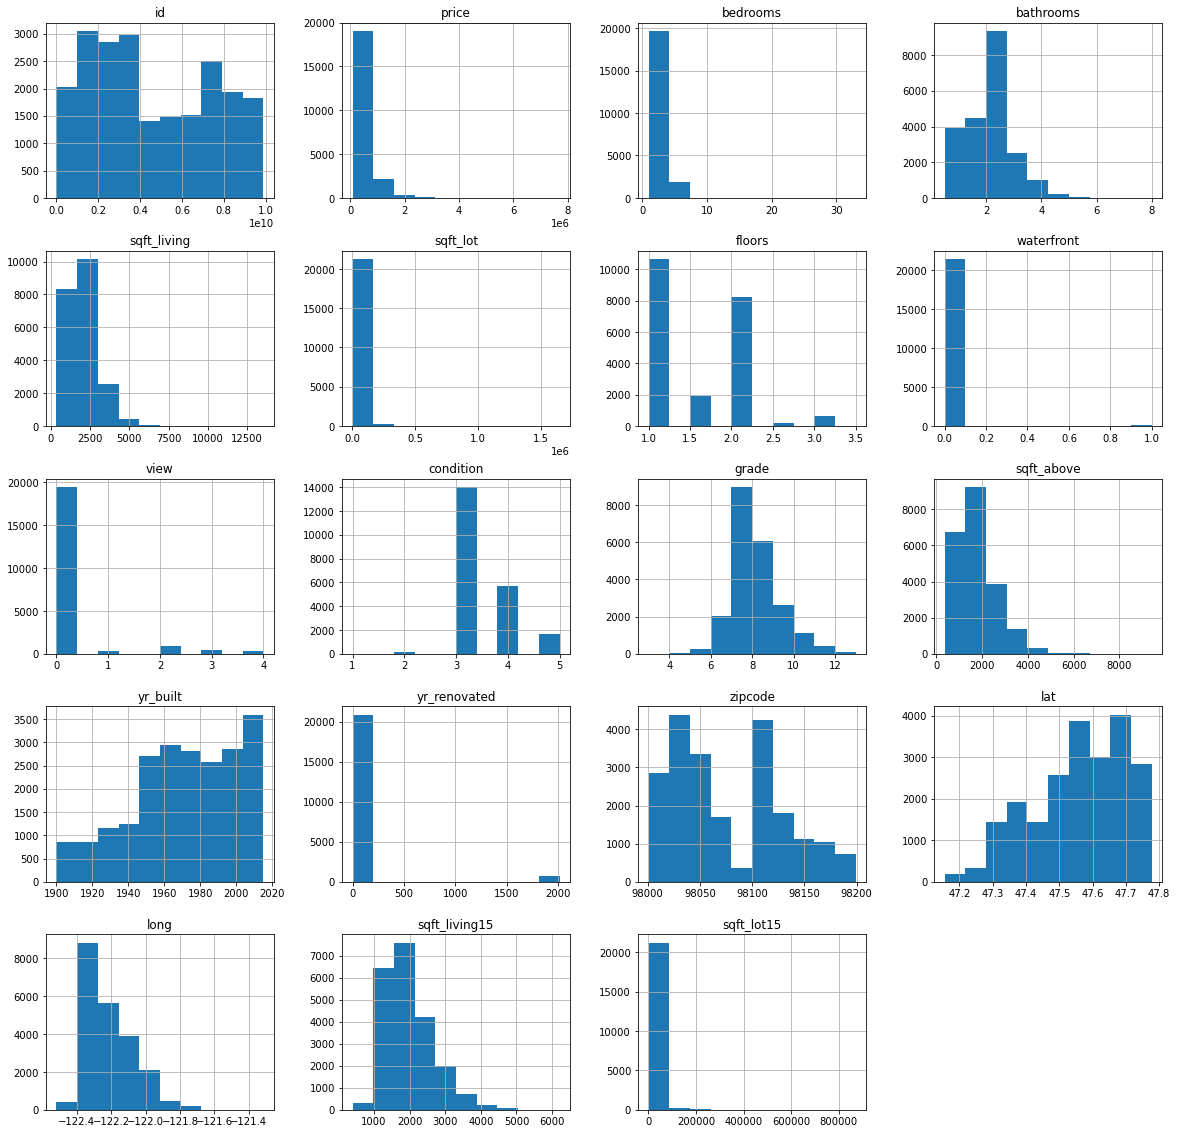

In [13]:
#Checking Cat Types

data.hist(figsize=(20,20));

In [14]:
#Seperate Cat Data from Cont Data

cont_data = ['price', 'sqft_living', 'sqft_lot', 'grade', 'sqft_above', 'sqft_living15', 'sqft_lot15', 'sqft_basement']

cat_data = []

for item in data.columns:
    if item not in cont_data:
        cat_data.append(item)

In [15]:
#remove 'id' from cat_data

###ALSO REMOVED BASEMENT DUE TO ERROR###

cat_data.remove('id')

cont_data.remove('sqft_basement')


In [16]:
#Check cat_data and cont_data

print('cat_data: ')
print(cat_data)

print('cont_data: ')
print(cont_data)

cat_data: 
['date', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long']
cont_data: 
['price', 'sqft_living', 'sqft_lot', 'grade', 'sqft_above', 'sqft_living15', 'sqft_lot15']


In [17]:
#Clean 'sqft_basement' non ints

# data['sqft_basement'] = data['sqft_basement'].apply(lambda x: x.replace('.0', ""))

# data['sqft_basement_int'] = data['sqft_basement'].apply(lambda x: int(float(x)))

In [18]:
#Quick Processing Data

###Ignore warnings:

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

#One Hot (So Hawt) Encode

data_ohe = pd.get_dummies(data[cat_data])

#Create Cont Dataset

data_cont = data[cont_data]

# #Log Data

logged_features = []

for item in list(data_cont.columns):
    data_cont[f'{item}_log'] = np.log(data_cont[item])
    logged_features.append(f'{item}_log')
    
scaled_features = []
for item in logged_features:
    data_cont[f'{item}_scaled'] = StandardScaler().fit_transform(data_cont[item].values.reshape(-1, 1))
    scaled_features.append(f'{item}_scaled')

#Create Features DataFrame
    
features_df = pd.concat([data_cont[scaled_features], data_ohe], axis = 1)

In [19]:
#Quick Check: features_df

features_df.head()

,price_log_scaled,sqft_living_log_scaled,sqft_lot_log_scaled,grade_log_scaled,sqft_above_log_scaled,sqft_living15_log_scaled,sqft_lot15_log_scaled,bedrooms,bathrooms,floors,...,date_9/28/2014,date_9/29/2014,date_9/3/2014,date_9/30/2014,date_9/4/2014,date_9/5/2014,date_9/6/2014,date_9/7/2014,date_9/8/2014,date_9/9/2014
0,-1.402030,-1.125582,-0.388439,-0.525943,-0.753583,-1.035453,-0.395459,3,1.00,1.0,...,0,0,0,0,0,0,0,0,0,0
1,0.279945,0.709463,-0.113243,-0.525943,0.672709,-0.326789,-0.024288,3,2.25,2.0,...,0,0,0,0,0,0,0,0,0,0
2,-1.799472,-2.131943,0.244481,-1.558145,-1.752995,1.126531,0.042037,2,1.00,1.0,...,0,0,0,0,0,0,0,0,0,0
3,0.499710,0.070676,-0.523926,-0.525943,-1.026858,-0.990210,-0.545863,4,3.00,1.0,...,0,0,0,0,0,0,0,0,0,0
4,0.178438,-0.292732,0.008140,0.368190,0.073516,-0.134221,-0.046395,3,2.00,1.0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
#Model 1: Dumbest Model

#Establish X and y

X = features_df.drop(['price_log_scaled'], axis = 1)
y = features_df['price_log_scaled']

#Instantiate Linear Regression and execute Cross Val Score for Model Validation

linreg = LinearRegression()

np.mean(cross_val_score(linreg, X, y, cv = 10, scoring='r2'))


-1974500662391702.8

## Model 1: Results

Initial R2 scores are very low, and potentially the result of too many features in the model. In order to mitigate this, a second model will be run which will only use the continuous variables.

In [21]:
#Model 2: Model without Categorical Features

#Establish X and y

X = features_df[scaled_features]
X = X.drop(['price_log_scaled'], axis = 1)
y = features_df['price_log_scaled']

#Instantiate Linear Regression and execute Cross Val Score for Model Validation

linreg = LinearRegression()

np.mean(cross_val_score(linreg, X, y, cv = 10, scoring='r2'))

0.5516699588367212

## Model 2: Results

R2 scores appear to be much higher when Categorical Variables are removed which indicates that Categorical variables may be the reason behind low R2 scores in Model 1. In order to mitigate this, the two Categorical Variables which result in the most dummy columns will be categorized.

The following will be assessed first:

'yr_built', 'yr_renovated', 'zipcode'


In [22]:
#Unique Value Counts for 'yr_built', 'yr_renovated', 'zipcode'

print('yr_built unique values: ')
print(len(data['yr_built'].unique()))

print('yr_renovated unique values: ')
print(len(data['yr_renovated'].unique()))

print('zipcode unique values: ')
print(len(data['zipcode'].unique()))

yr_built unique values: 
116
yr_renovated unique values: 
70
zipcode unique values: 
70


In [23]:
#Restructure yr_built into a continuous variable called 'age'

data['age'] = data['yr_built'].apply(lambda x: 2021 - x)


In [24]:
#Restructure yr_rennovated into a continuous variable called 'renovated_x_years_ago'

data['renovated_x_years_ago'] = data['yr_renovated'].apply(lambda x: 2021 - x if x != 0 else 0)

In [25]:
#Create new buckets for refurbished data

def refurbished(x):
    if x == 0:
        return "Never Refurbished"
    elif x <= 10:
        return "Refurbished less than 10 Years Ago"
    else:
        return "Refurbished More than 10 Years Ago"
    
refurbished(9)

data['refurbished'] = data['renovated_x_years_ago'].apply(lambda x: refurbished(x))

#Refurbished Data Check

data[data['renovated_x_years_ago'] > 10][['refurbished', 'renovated_x_years_ago']]

data['refurbished'].value_counts()

Never Refurbished                     20853
Refurbished More than 10 Years Ago      609
Refurbished less than 10 Years Ago      135
Name: refurbished, dtype: int64

In [26]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'age',
       'renovated_x_years_ago', 'refurbished'],
      dtype='object')

In [27]:
#Adding Age to Cont Data

cont_data = ['price',
 'sqft_living',
 'sqft_lot',
 'grade',
 'sqft_above',
 'sqft_living15',
 'sqft_lot15',
 'age']

In [28]:
#Removing 'date', lat', 'long', 'yr_built', and 'yr_renovated' from Cat Data

cat_data = [
 'bedrooms',
 'bathrooms',
 'floors',
 'waterfront',
 'view',
 'condition',
 'zipcode',
 'refurbished']

In [29]:
#Recreate Features Data Set

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

#One Hot (So Hawt) Encode

data_ohe = pd.get_dummies(data[cat_data])

#Create Cont Dataset

data_cont = data[cont_data]

# #Log Data

logged_features = []

for item in list(data_cont.columns):
    data_cont[f'{item}_log'] = np.log(data_cont[item])
    logged_features.append(f'{item}_log')
    
scaled_features = []
for item in logged_features:
    data_cont[f'{item}_scaled'] = StandardScaler().fit_transform(data_cont[item].values.reshape(-1, 1))
    scaled_features.append(f'{item}_scaled')

#Create Features DataFrame
    
features_df = pd.concat([data_cont[scaled_features], data_ohe], axis = 1)

In [30]:
features_df.head()

,price_log_scaled,sqft_living_log_scaled,sqft_lot_log_scaled,grade_log_scaled,sqft_above_log_scaled,sqft_living15_log_scaled,sqft_lot15_log_scaled,age_log_scaled,bedrooms,bathrooms,floors,waterfront,view,condition,zipcode,refurbished_Never Refurbished,refurbished_Refurbished More than 10 Years Ago,refurbished_Refurbished less than 10 Years Ago
0,-1.402030,-1.125582,-0.388439,-0.525943,-0.753583,-1.035453,-0.395459,0.689469,3,1.00,1.0,0.0,0.0,3,98178,1,0,0
1,0.279945,0.709463,-0.113243,-0.525943,0.672709,-0.326789,-0.024288,0.771392,3,2.25,2.0,0.0,0.0,3,98125,0,1,0
2,-1.799472,-2.131943,0.244481,-1.558145,-1.752995,1.126531,0.042037,1.090006,2,1.00,1.0,0.0,0.0,3,98028,1,0,0
3,0.499710,0.070676,-0.523926,-0.525943,-1.026858,-0.990210,-0.545863,0.460711,4,3.00,1.0,0.0,0.0,5,98136,1,0,0
4,0.178438,-0.292732,0.008140,0.368190,0.073516,-0.134221,-0.046395,-0.234029,3,2.00,1.0,0.0,0.0,3,98074,1,0,0


In [31]:
#Model 3: Model without 'lat', 'long', 'yr_built', and 'yr_renovated' but now includes 'refurbished' and 'age'

#Establish X and y


X = features_df.drop(['price_log_scaled'], axis = 1)
y = features_df['price_log_scaled']

#Instantiate Linear Regression and execute Cross Val Score for Model Validation

linreg = LinearRegression()

np.mean(cross_val_score(linreg, X, y, cv = 10, scoring='r2'))

0.6242158568177594

## Model 3 Results

R2 scores have marginally improved, but location is currently being ignored as the get_dummies function is not understanding the zipcode. Model 4 will turn Zipcode into str and use it to create 70 binary columns.

In [32]:
#Convert zipcode to a str

data['zipcode_str'] = data['zipcode'].apply(lambda x: str(x))

In [33]:
#Establish new Cont and Cat data

cont_data = ['price',
 'sqft_living',
 'sqft_lot',
 'grade',
 'sqft_above',
 'sqft_living15',
 'sqft_lot15',
 'age']

cat_data = [
 'bedrooms',
 'bathrooms',
 'floors',
 'waterfront',
 'view',
 'condition',
 'zipcode_str',
 'refurbished']

In [34]:
#Recreate Features Data Set

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

#One Hot (So Hawt) Encode

data_ohe = pd.get_dummies(data[cat_data])

#Create Cont Dataset

data_cont = data[cont_data]

# #Log Data

logged_features = []

for item in list(data_cont.columns):
    data_cont[f'{item}_log'] = np.log(data_cont[item])
    logged_features.append(f'{item}_log')
    
scaled_features = []
for item in logged_features:
    data_cont[f'{item}_scaled'] = StandardScaler().fit_transform(data_cont[item].values.reshape(-1, 1))
    scaled_features.append(f'{item}_scaled')

#Create Features DataFrame
    
features_df = pd.concat([data_cont[scaled_features], data_ohe], axis = 1)

In [35]:
#Model 4: Model without 'lat', 'long', 'yr_built', and 'yr_renovated' but now includes 'refurbished' and 'age'

#Establish X and y

X = features_df
X = X.drop(['price_log_scaled'], axis = 1)
y = features_df['price_log_scaled']

#Instantiate Linear Regression and execute Cross Val Score for Model Validation

linreg = LinearRegression()

np.mean(cross_val_score(linreg, X, y, cv = 10, scoring='r2'))

0.879110423608172

## Model 4 Results

Model 4 has resulted in a much higher R2 score, which I believe has resulted from taking location into account as a categorical variable.

Though a R2 of 88% is high, I believe there is still room for improvement.

As such the following steps will be taken:

1. Check for further Heteroskedasticity and Polynomial Patterns
2. Check for Multicolinearity
3. Check for potential interactions
4. Select features

Text(0, 0.5, 'Predicted')

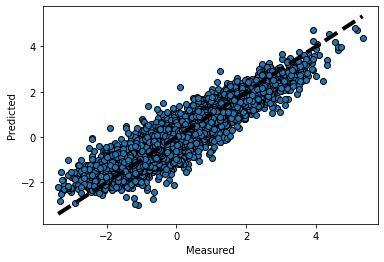

In [36]:
#Checking for further heteroskedasticity and potential polynomial patterns (code taken from Scikitlearn Doc
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_predict.html#sphx-glr-auto-examples-model-selection-plot-cv-predict-py)

from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

lr = linear_model.LinearRegression()

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, X, y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')

In [37]:
#   Checking for Multi-Colinearity (code copy pasted from Curriculum Lab: 
#   https://github.com/learn-co-curriculum/dsc-multicollinearity-of-features-lab/tree/solution)

df = features_df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df['pairs'] = list(zip(df.level_0, df.level_1))

df.set_index(['pairs'], inplace = True)

df.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
df.columns = ['cc']

df.drop_duplicates(inplace=True)

colinear_pairs = df[(df.cc>.75) & (df.cc<1)]

colinear_pairs

,cc
pairs,
"(sqft_lot_log_scaled, sqft_lot15_log_scaled)",0.918665
"(refurbished_Refurbished More than 10 Years Ago, refurbished_Never Refurbished)",0.901822
"(sqft_living_log_scaled, sqft_above_log_scaled)",0.864979
"(sqft_living_log_scaled, bathrooms)",0.762135


In [38]:
#Create a colinear_pairs data frame

colinear_pairs.columns = ['colinearity']

colinear_pairs = colinear_pairs.reset_index(drop=False)

colinear_pairs



,pairs,colinearity
0,"(sqft_lot_log_scaled, sqft_lot15_log_scaled)",0.918665
1,(refurbished_Refurbished More than 10 Years Ag...,0.901822
2,"(sqft_living_log_scaled, sqft_above_log_scaled)",0.864979
3,"(sqft_living_log_scaled, bathrooms)",0.762135


In [39]:
#Checking for most prominent features (code taken from curriculum)

linreg.fit(X, y)

myDict = dict(zip(X.columns, linreg.coef_))

#Isolating least valuable features from colinear pairs

colinear_pairs['pair_1'] = colinear_pairs['pairs'].apply(lambda x: x[0])
colinear_pairs['pair_2'] = colinear_pairs['pairs'].apply(lambda x: x[1])
colinear_pairs['coef_1'] = colinear_pairs['pair_1'].apply(lambda x: myDict[x])
colinear_pairs['coef_2'] = colinear_pairs['pair_2'].apply(lambda x: myDict[x])
colinear_pairs['lesser_coef'] = np.where((colinear_pairs['coef_1'] > colinear_pairs['coef_2']), 
                                          colinear_pairs['pair_2'], colinear_pairs['pair_1'])

dropped_pairs = colinear_pairs['lesser_coef']

print(f'Pairs to Potentially Drop:')
list(dropped_pairs)

Pairs to Potentially Drop:


['sqft_lot15_log_scaled',
 'refurbished_Never Refurbished',
 'sqft_above_log_scaled',
 'bathrooms']

## Multicolinearity Analysis Results

It appears that there are 4 pair candidates for Multicolinearity:

0	(sqft_lot_log_scaled, sqft_lot15_log_scaled)	0.918712
1	(refurbished_Refurbished More than 10 Years Ag...	0.901679
2	(sqft_living_log_scaled, sqft_above_log_scaled)	0.865059
3	(sqft_living_log_scaled, bathrooms)

In order to determine which feature to keep, a DF was created which isolated the most prominent feature.

based on this analysis the following pairs have been reccomended to be dropped:

 'sqft_lot15_log_scaled',
 'refurbished_Never Refurbished',
 'sqft_above_log_scaled',
 'bathrooms'
 
 Next actions to be taken:
 
 1. It appears that sqft_lot15 is a function of the sqft_lot and will be dropped.
 2. Refurbishing a house seems to have a binary effect on the model, wherein a refurbished house sells for more
    regardless of when it was refurbished. In order to cut down on features, a new column will be created to
    reflect that.
 3. 'sqft_above' seems to also be a function of 'sqft_living' and will be dropped
 4. Houses with larger floor plans have more bathrooms, but this doesn't mean that bathrooms is a function 
    of floor space, as such bathrooms will be kept.

In [40]:
#Create look up list of cat / cont features to be droppped

dropped_colinear_features = ['sqft_lot15', 'sqft_above']

def drop_colinear_features(feature_list):
    for item in feature_list:
        if item in dropped_colinear_features:
            feature_list.remove(item)
            
drop_colinear_features(cat_data)
drop_colinear_features(cont_data)

print(f'Cont Data:')
print(cont_data)

print(f'Cat Data:')
print(cat_data)

Cont Data:
['price', 'sqft_living', 'sqft_lot', 'grade', 'sqft_living15', 'age']
Cat Data:
['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'zipcode_str', 'refurbished']


In [41]:
#Drop first 'refurbished' and ' renovated_x_years_ago' columns

data.drop(['refurbished'], axis = 1, inplace=True)
data.drop(['renovated_x_years_ago'], axis = 1, inplace=True)

#create 'ever_refurbished' to reflect whether or not a house has even been refurbished

data['refurbished'] = np.where((data['yr_renovated'] > 0),"Yes","No")

In [42]:
#Quick data check

data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age,zipcode_str,refurbished
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,1955,0.0,98178,47.5112,-122.257,1340,5650,66,98178,No
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,70,98125,Yes
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,1933,0.0,98028,47.7379,-122.233,2720,8062,88,98028,No
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1965,0.0,98136,47.5208,-122.393,1360,5000,56,98136,No
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1987,0.0,98074,47.6168,-122.045,1800,7503,34,98074,No


In [43]:
#recreate features_df

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

#One Hot (So Hawt) Encode

data_ohe = pd.get_dummies(data[cat_data])

#Create Cont Dataset

data_cont = data[cont_data]

# #Log Data

logged_features = []

for item in list(data_cont.columns):
    data_cont[f'{item}_log'] = np.log(data_cont[item])
    logged_features.append(f'{item}_log')
    
scaled_features = []
for item in logged_features:
    data_cont[f'{item}_scaled'] = StandardScaler().fit_transform(data_cont[item].values.reshape(-1, 1))
    scaled_features.append(f'{item}_scaled')

#Create Features DataFrame
    
features_df = pd.concat([data_cont[scaled_features], data_ohe], axis = 1)

In [44]:
##Model 5: Model 4 without colinearity and binary categorizaiton for refurbished

#Establish X and y

X = features_df
X = X.drop(['price_log_scaled'], axis = 1)
y = features_df['price_log_scaled']

#Instantiate Linear Regression and execute Cross Val Score for Model Validation

linreg = LinearRegression()

np.mean(cross_val_score(linreg, X, y, cv = 10, scoring='r2'))

0.8758102811240122

## Model 5 Results:

Reducing features inevitably led to a reduction in the R2 score, however, I believe this will be beneficial
when we begin exploring iterations. As such, I will keep the reduced R2 score and look for potential interactions.

In [45]:
#removing zipcodes from X

interaction_features = []

for item in list(X.columns):
    if 'zip' not in item:
        interaction_features.append(item)

interaction_features

interaction_data = X[interaction_features]

In [46]:
#Creating baseline model

baseline = np.mean(cross_val_score(linreg, X[interaction_features], y, cv = 10, scoring='r2'))

baseline

0.6183665892769868

In [47]:
##looking for interactions in the model (code taken from the curriculum), using divide

from itertools import combinations

interactions = []

feat_combinations = combinations(interaction_data.columns, 2)

for i, (a, b) in enumerate(feat_combinations):
    interaction_data['interaction'] = interaction_data[a] / interaction_data[b]
    score = np.mean(cross_val_score(linreg, interaction_data, y, scoring='r2', cv=10))
    if score > baseline:
        interactions.append((a, b, round(score,3)))
    
    if i % 50 == 0:
        print(i)

div_int = [sorted(interactions, key=lambda inter: inter[2], reverse=True)[:5]]

0
50


In [48]:
##looking for interactions in the model (code taken from the curriculum), using multiply

from itertools import combinations

interactions = []

feat_combinations = combinations(interaction_data.columns, 2)

for i, (a, b) in enumerate(feat_combinations):
    interaction_data['interaction'] = interaction_data[a] * interaction_data[b]
    score = np.mean(cross_val_score(linreg, interaction_data, y, scoring='r2', cv=10))
    if score > baseline:
        interactions.append((a, b, round(score,3)))
    
    if i % 50 == 0:
        print(i)

mult_int = [sorted(interactions, key=lambda inter: inter[2], reverse=True)[:5]]

0
50


In [49]:
#Looking at Multiplied Interactions:

def interactions(interaction_list):
    feature_1 = []
    feature_2 = []
    r2 = []
    corr = []

    for a, b, c in interaction_list[0]:
        feature_1.append(a)
        feature_2.append(b)
        r2.append(c)
        corr.append(X[[a, b]].corr()[a][1])
        

    col1 = pd.DataFrame(feature_1)
    col2 = pd.DataFrame(feature_2)
    col3 = pd.DataFrame(r2)
    col4 = pd.DataFrame(corr)

    mult_feature_corr = pd.concat([col1, col2, col3, col4], axis = 1)

    mult_feature_corr.columns = ['Feature_1', 'Feature_2', 'R2', 'Corr']

    return mult_feature_corr, feature_1, feature_2

interactions(mult_int)[0]

,Feature_1,Feature_2,R2,Corr
0,grade_log_scaled,age_log_scaled,0.632,-0.459987
1,age_log_scaled,bathrooms,0.631,-0.518969
2,sqft_living_log_scaled,bathrooms,0.629,0.762135
3,grade_log_scaled,bathrooms,0.629,0.665309
4,age_log_scaled,floors,0.629,-0.591259


In [50]:
#Looking at Divided Interactions

interactions(div_int)

(                Feature_1  Feature_2     R2      Corr
 0          age_log_scaled  bathrooms  0.631 -0.518969
 1  sqft_living_log_scaled  bathrooms  0.628  0.762135
 2        grade_log_scaled  bathrooms  0.627  0.665309
 3          age_log_scaled     floors  0.627 -0.591259
 4  sqft_living_log_scaled   bedrooms  0.625  0.621820,
 ['age_log_scaled',
  'sqft_living_log_scaled',
  'grade_log_scaled',
  'age_log_scaled',
  'sqft_living_log_scaled'],
 ['bathrooms', 'bathrooms', 'bathrooms', 'floors', 'bedrooms'])

In [51]:
#recreate features_df for Model 6

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

#One Hot (So Hawt) Encode

data_ohe = pd.get_dummies(data[cat_data])

#Create Cont Dataset

data_cont = data[cont_data]

# #Log Data

logged_features = []

for item in list(data_cont.columns):
    data_cont[f'{item}_log'] = np.log(data_cont[item])
    logged_features.append(f'{item}_log')
    
scaled_features = []
for item in logged_features:
    data_cont[f'{item}_scaled'] = StandardScaler().fit_transform(data_cont[item].values.reshape(-1, 1))
    scaled_features.append(f'{item}_scaled')

#Create Features DataFrame
    
features_df = pd.concat([data_cont[scaled_features], data_ohe], axis = 1)

In [52]:
scaled_features

['price_log_scaled',
 'sqft_living_log_scaled',
 'sqft_lot_log_scaled',
 'grade_log_scaled',
 'sqft_living15_log_scaled',
 'age_log_scaled']

In [53]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2)

X2 = X[scaled_features]

# X_poly = poly.fit(X2, y)

# np.mean(cross_val_score(linreg, X_poly, y, cv = 10, scoring='r2'))

X_poly = polyfit

KeyError: "['price_log_scaled'] not in index"

In [ ]:
##Model 6

#Establish X and y

X = features_df
X = X.drop(['price_log_scaled'], axis = 1)
y = features_df['price_log_scaled']

#Instantiate Linear Regression and execute Cross Val Score for Model Validation

linreg = LinearRegression()

np.mean(cross_val_score(linreg, X, y, cv = 10, scoring='r2'))

## Interactions Analysis

1. There seems to be a strong relationship between Bedrooms and Sqft. This would validate the assumption
   that big houses with many bedrooms sell for more money. 